In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set(style="whitegrid")


In [ ]:
# Análisis Avanzado de Clasificación para Diagnóstico de Cáncer de Mama

Este notebook presenta un análisis exhaustivo y avanzado para la clasificación de tumores de mama utilizando múltiples algoritmos de machine learning, técnicas de optimización y validación robusta.

## Objetivos:
- Realizar un análisis exploratorio profundo del dataset
- Implementar y comparar múltiples algoritmos de clasificación
- Optimizar hiperparámetros usando técnicas avanzadas
- Evaluar modelos con métricas comprehensivas
- Crear visualizaciones interactivas y explicativas

In [18]:
# CARGAR EL DATASET
df = pd.read_csv(r"../breast-cancer.csv")

# INFORMACION GENERAL
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Distribución de diagnósticos:
diagnosis
B    357
M    212
Name: count, dtype: int64

Porcentaje de cada clase:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


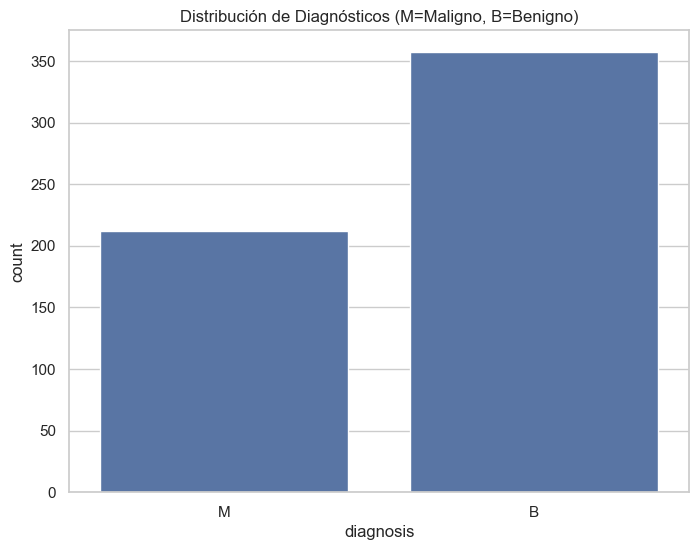

In [19]:
# Distribución de clases
print("Distribución de diagnósticos:")
print(df['diagnosis'].value_counts())
print("\nPorcentaje de cada clase:")
print(df['diagnosis'].value_counts(normalize=True) * 100)

# Visualización
plt.figure(figsize=(8,6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribución de Diagnósticos (M=Maligno, B=Benigno)')
plt.show()


In [20]:
# Variable objetivo y predictoras
X = df.drop(['id', 'diagnosis'], axis=1)  # Todas las características numéricas
y = (df['diagnosis'] == 'M').astype(int)  # M=1, B=0

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, max_iter=1000))
])

param_dist_lr = {
    'lr__C': np.logspace(-4, 4, 20),
    'lr__penalty': ['l1', 'l2', 'elasticnet', None],
    'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'lr__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}


In [22]:
random_search_lr = RandomizedSearchCV(
    pipeline_lr, param_distributions=param_dist_lr,
    n_iter=20, cv=5, scoring='accuracy',
    random_state=42, n_jobs=-1
)
random_search_lr.fit(X_train, y_train)

print("Mejores hiperparámetros:")
print(random_search_lr.best_params_)

best_model_lr = random_search_lr.best_estimator_


Mejores hiperparámetros:
{'lr__solver': 'lbfgs', 'lr__penalty': 'l2', 'lr__l1_ratio': 0.3, 'lr__C': np.float64(4.281332398719396)}


Accuracy: 0.9737

 GRAFICA DE MATRIZ DE CONFUSION :
[[71  1]
 [ 2 40]]

 INFORME DE CLASIFICACION:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



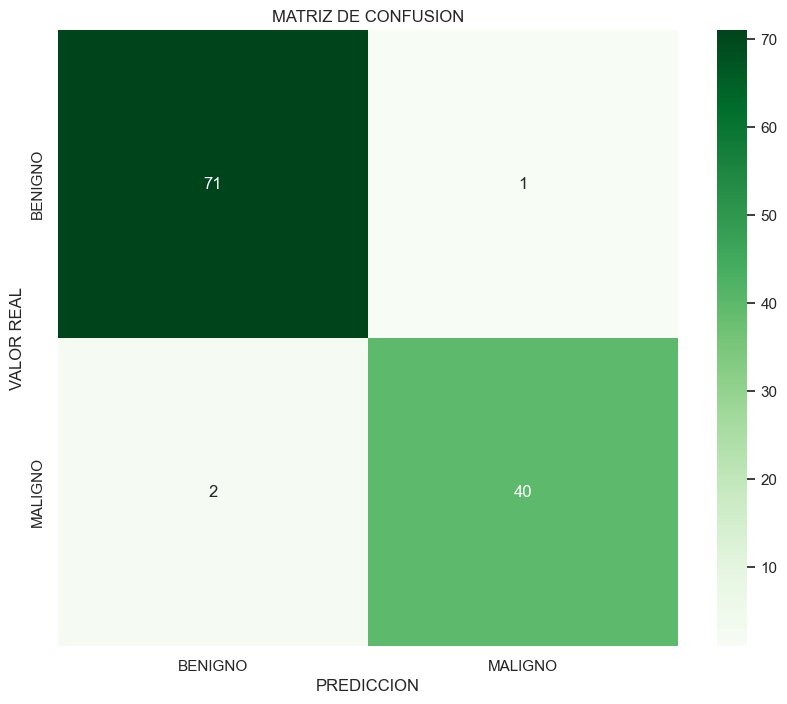

In [25]:
y_pred = best_model_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\n GRAFICA DE MATRIZ DE CONFUSION :")
print(conf_matrix)
print("\n INFORME DE CLASIFICACION:")
print(class_report)

# Matriz de confusión
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['BENIGNO','MALIGNO'],
            yticklabels=['BENIGNO','MALIGNO'])
plt.xlabel('PREDICCION')
plt.ylabel('VALOR REAL')
plt.title('MATRIZ DE CONFUSION')
plt.show()


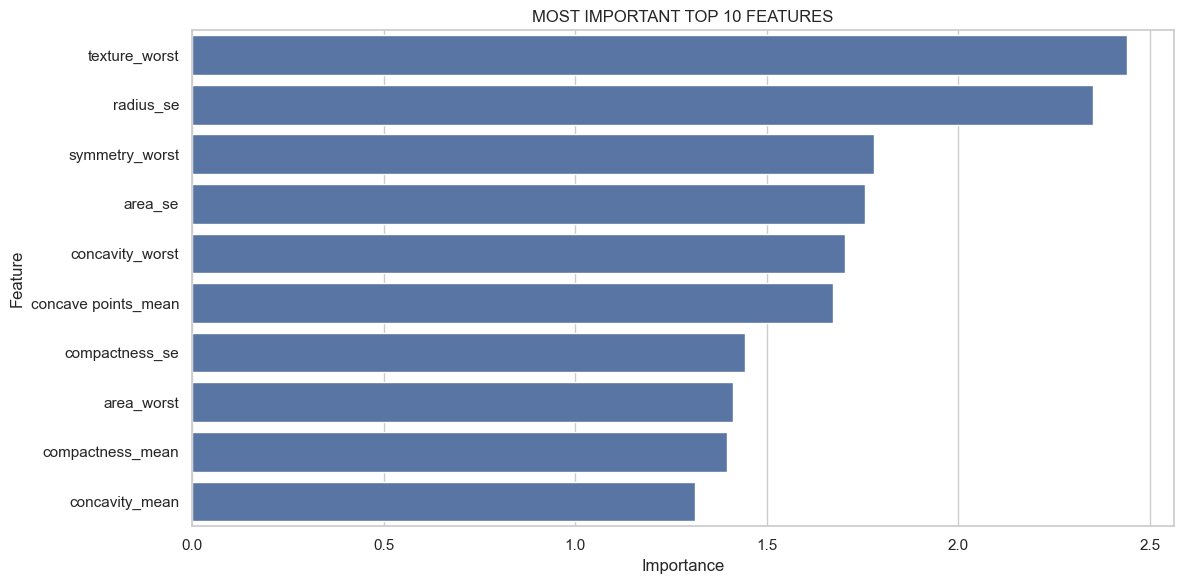

In [26]:
if hasattr(best_model_lr['lr'], 'coef_'):
    coef = best_model_lr['lr'].coef_[0]
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coef)})
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12,6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
    plt.title('MOST IMPORTANT TOP 10 FEATURES')
    plt.tight_layout()
    plt.show()


In [28]:
resultados = X_test.copy()
resultados['Real'] = y_test
resultados['Prediccion'] = y_pred

resultados.to_csv(r"C:\Users\miral\Downloads\resultados_cancer.csv", index=False) 
print("Archivo exportado en C:\\Users\\miral\\Downloads\\resultados_cancer.csv") 


Archivo exportado en C:\Users\miral\Downloads\resultados_cancer.csv
